# ASTR 420 - Week 6:  "Family Traits of Nebulae" 

The Hubble system of galaxy morphological classification is illustrated in the well-known tuning-fork diagram, published in his 1936 book "The Realm of the Nebulae".  This has often been misinterpreted as a diagram for galaxy evolution, but it was really only ever intended for classification purposes. As we will find out later, galaxy evolution is a much more complicated process than what might be naively assumed from the historical terminology of "early-type" and "late-type" galaxies. 

![TuningFork](img/TuningFork.jpeg)

With the advent of the vast Sloan Digital Sky Survey, which has imaged one quarter of the night sky, we now have detailed images of hundreds of thousands of galaxies in the local universe.  The SDSS DR8 also includes data on visual galaxy morphologies from the 
 [Galaxy Zoo](https://www.zooniverse.org/projects/zookeeper/galaxy-zoo/) project. Galaxy Zoo is a web-based project
 that used the collective efforts of about 100,000 volunteer 
 citizen scientists to classify more than one million
 SDSS DR7 Main Galaxy Sample (MGS) galaxies.
 Full details on the classification process, including the operation
 of the site and estimates of classification accurary, are given in
 [Lintott et al. (2008)](http://adsabs.harvard.edu/abs/2008MNRAS.389.1179L).
 
 Today we'll use SDSS data and GalaxyZoo morphological classifications to explore how various properties of galaxies like color, shape, and magnitude are related. 
 
 Let's start, as always, by importing all of the most important libraries that we're likely to need...

In [9]:
# Import Python libraries to work with SciServer (see http://www.sciserver.org/docs/sciscript-python/)

import SciServer.CasJobs as CasJobs # query with CasJobs, the primary database for the SDSS
import SciServer.SkyServer as SkyServer # show individual objects through SkyServer
import SciServer.SciDrive           # read/write to/from SciDrive, cloud-based storage for your work
import numpy as np                  # standard Python library for math operations
import pandas                       # package for structuring and visualizing data
import matplotlib.pyplot as plt     # package for graphing and visualization 
print('SciServer libraries imported')

# Apply some special settings to the imported libraries

# ensures columns get written completely in notebook
pandas.set_option('display.max_colwidth', -1)
# do *not* show python warnings 
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display, Image, SVG, Math
print('Settings applied')

# So that we're able to make plots, import matplotlib and some of its modules

import matplotlib
%config InlineBackend.rc = {}
from matplotlib import pylab as plt
%matplotlib inline
print('OK')


SciServer libraries imported
Settings applied
OK


 ------------------------
 ### Exploring Morphological Trends with GalaxyZoo

Galaxy Zoo data are contained in tables that begin with "zoo"
in the [SDSS Table schema](http://skyserver.sdss.org/dr15/en/help/browser/browser.aspx#&&history=shortdescr+Tables+U). For each galaxy, available data includes its
SDSS object ID and weighted probabilities for each of six different
morphological classifications based on counts of volunteer "votes".
Full details on what data the Galaxy Zoo catalog contains are given
in [Lintott et al. (2010)](http://adsabs.harvard.edu/abs/2011MNRAS.410..166L).

The example query below finds the weighted probability that a given galaxy has each of the following six morphological classifications:

elliptical: 'p_el'

spiral (clockwise winding):  'p_cw' 

spiral (counter-clockwise winding): 'p_acw' 

edge-on: 'p_edge'

merger: 'p_mg'

undetermined: 'p_dk'


In [13]:
# Here's an example query to return 100 galaxies that have spectra, clean photometry,
# at least 10 Galaxy Zoo volunteer votes, and at least an 80% probability
# of being clockwise spirals.

query="""
SELECT TOP 100 p.objid, p.ra,p.dec,p.petror90_r, p.dered_g, s.z as z_spec, s.zErr, zns.nvote, zns.p_el as elliptical, zns.p_cw as spiralclock, zns.p_acw as spiralanticlock, zns.p_edge as edgeon, zns.p_dk as dontknow, zns.p_mg as merger
  FROM Galaxy as p
   JOIN ZooNoSpec AS zns ON p.objid = zns.objid
   JOIN SpecObj AS s ON s.bestobjid = p.objid
WHERE p.clean=1 and zns.nvote >= 10 and zns.p_cw > 0.8
"""
zoo_gals = CasJobs.executeQuery(query, "dr16")
zoo_gals = zoo_gals.set_index('objid')
zoo_gals

,ra,dec,petror90_r,dered_g,z_spec,zErr,nvote,elliptical,spiralclock,spiralanticlock,edgeon,dontknow,merger
objid,,,,,,,,,,,,,
1237668650926342749,241.829163,-0.443972,9.176703,17.18769,0.074706,0.000012,20,0.000,0.850,0.050,0.100,0.000,0.000
1237668650926539340,242.274702,-0.574642,7.471252,16.53492,0.056719,0.000008,32,0.031,0.906,0.000,0.062,0.000,0.000
1237648673458684355,244.496791,-0.498398,9.355639,16.13657,0.050477,0.000009,23,0.000,1.000,0.000,0.000,0.000,0.000
1237655560403354055,248.120390,-0.478861,7.999845,16.81796,0.070390,0.000023,40,0.075,0.800,0.000,0.100,0.000,0.025
1237648704064454738,238.736718,-0.209378,11.107280,15.60193,0.042800,0.000007,37,0.000,0.946,0.054,0.000,0.000,0.000
1237648673995686549,244.875590,-0.038526,12.179800,16.53927,0.079218,0.000027,35,0.000,0.971,0.029,0.000,0.000,0.000
1237655550206804790,247.424991,-0.167082,8.663761,17.34978,0.044132,0.000015,52,0.038,0.808,0.019,0.058,0.019,0.058
1237655554497315264,247.530807,-0.193460,9.905840,15.91343,0.046768,0.000025,31,0.032,0.935,0.000,0.000,0.000,0.032
1237668569320980980,240.498466,0.319765,9.797406,17.35759,0.041010,0.000021,22,0.000,0.818,0.000,0.182,0.000,0.000


#### **Your turn:  In the cell below, write a search of the [zoo2MainSpecz](https://skyserver.sdss.org/dr12/en/help/browser/browser.aspx#&&history=description+zoo2MainSpecz+U) Table to retrieve the major types of galaxies in the Hubble's "Tuning Fork" diagram.  Measure the average color for a large sample of each.**

A description of the method used to collect the data in the GalaxyZoo 2 data table are described in [Willet et al. 2013](http://adsabs.harvard.edu/cgi-bin/nph-data_query?bibcode=2013MNRAS.435.2835W&link_type=ARTICLE&db_key=AST&high=).  A flowchart of the questions used to determine morphological characteristics is shown below.
![GalaxyZoo2](img/Willet1.png)



In [53]:
#find spirals

query="""
SELECT TOP 500 p.objid, p.ra,p.dec,p.petror90_r, p.dered_g, p.dered_r, s.z as z_spec, s.zErr
  FROM Galaxy as p
   JOIN zoo2MainSpecz AS zms ON p.objid = zms.dr8objid
   JOIN SpecObj AS s ON s.bestobjid = p.objid
WHERE p.clean=1 AND zms.total_votes >= 10 AND zms.t03_bar_a07_no_bar_weighted_fraction > 0.8 AND 
    zms.t04_spiral_a08_spiral_flag =1 AND p.dered_g/p.err_g > 10 AND p.dered_r/p.err_r > 10 AND s.z BETWEEN 0.1 and 0.12
"""
latetype_s_gals = CasJobs.executeQuery(query, "dr16")
latetype_s = latetype_s_gals.set_index('objid')

#find barred spirals

query="""
SELECT TOP 500 p.objid, p.ra,p.dec,p.petror90_r, p.dered_g, p.dered_r, s.z as z_spec, s.zErr
  FROM Galaxy as p
   JOIN zoo2MainSpecz AS zms ON p.objid = zms.dr8objid
   JOIN SpecObj AS s ON s.bestobjid = p.objid
WHERE p.clean=1 and zms.total_votes >= 10 AND zms.t03_bar_a06_bar_weighted_fraction > 0.8 AND
    t03_bar_a06_bar_flag = 1 AND p.dered_g/p.err_g > 10 AND p.dered_r/p.err_r > 10 AND s.z BETWEEN 0.1 and 0.12
"""
latetype_sb_gals = CasJobs.executeQuery(query, "dr16")
latetype_sb = latetype_sb_gals.set_index('objid')


#find ellipticals

query="""
SELECT TOP 500 p.objid, p.ra,p.dec,p.petror90_r, p.dered_g, p.dered_r, s.z as z_spec, s.zErr
  FROM Galaxy as p
   JOIN zoo2MainSpecz AS zms ON p.objid = zms.dr8objid
   JOIN SpecObj AS s ON s.bestobjid = p.objid
WHERE  p.clean=1 and zms.total_votes >= 10 AND zms.t01_smooth_or_features_a01_smooth_weighted_fraction > 0.8 AND zms.t01_smooth_or_features_a01_smooth_flag = 1 AND p.dered_g/p.err_g > 10 AND p.dered_r/p.err_r > 10 AND (s.z BETWEEN 0.1 and 0.12)
"""
earlytype_gals = CasJobs.executeQuery(query, "dr16")
early = earlytype_gals.set_index('objid')
early


,ra,dec,petror90_r,dered_g,dered_r,z_spec,zErr
objid,,,,,,,
1237651272972828800,176.153340,67.405865,26.644100,16.04484,15.07576,0.116120,0.000017
1237665329859592296,204.311472,30.612569,9.159123,17.21362,16.24968,0.117509,0.000022
1237665330381717575,164.818650,31.001394,4.226818,17.78670,16.78049,0.109128,0.000028
1237659162817921452,253.337356,30.410718,11.460840,17.06440,16.11905,0.104286,0.000024
1237662636363677868,212.951723,12.791821,6.993006,17.15524,16.30363,0.108888,0.000010
1237662636376064458,241.278556,7.889052,5.730755,17.29864,16.34871,0.102039,0.000018
1237662637442990439,225.920582,11.716373,11.143790,17.02724,15.99948,0.114072,0.000022
1237651272963588221,135.025137,57.259309,6.326252,17.38606,16.48778,0.100020,0.000016
1237651272973418601,179.732767,67.523382,8.240218,16.60527,15.59328,0.116154,0.000020


In [55]:
# calculate the g-r color for non-barred spirals
gmr_latetype_s = latetype_s['dered_g']-latetype_s['dered_r']

# calculate the g-r color for barred spirals
gmr_latetype_sb = latetype_sb['dered_g']-latetype_sb['dered_r']

# calculate the g-r color for early-type / ellipticals
gmr_early = early['dered_g']-early['dered_r']

# calculate the average color for each morphology type
gmr_avg_late_s = np.mean(gmr_latetype_s)
gmr_avg_late_sb = np.mean(gmr_latetype_sb)
gmr_avg_early = np.mean(gmr_early)

print('Average g-r:\n')
print('Spirals: ' + str(np.round(gmr_avg_late_s,2)))
print('Barred Spirals: ' + str(np.round(gmr_avg_late_sb,2)))
print('Ellipticals: ' + str(np.round(gmr_avg_early,2)))


Average g-r:

Spirals: 0.72
Barred Spirals: 0.85
Ellipticals: 0.95


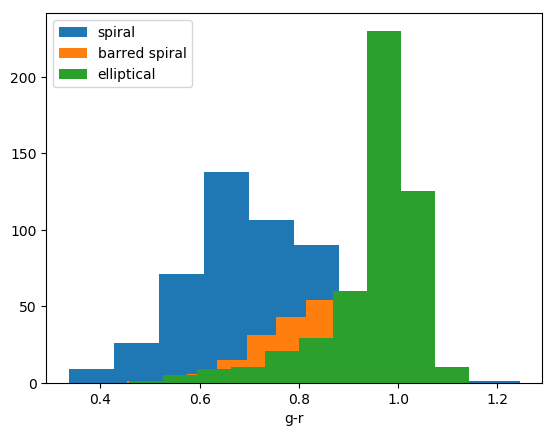

In [56]:
plt.hist(gmr_latetype_s, label = 'spiral')
plt.hist(gmr_latetype_sb, label = 'barred spiral')
plt.hist(gmr_early, label = 'elliptical')
plt.legend()
plt.xlabel('g-r')
plt.show()

**Interpretation:** Looking at the statistics of the color distributions, we see here quite clearly that the mean color for elliptical galaxies is the most red of the three types we have compared.  Barred spiral galaxies seem to peak somewhere in the middle of the color range between the much bluer average colors of spirals and the much redder average color of ellipticals.

----------------------
## Adding morphological information to the Galaxy Color-Magnitude Diagram

Earlier in this course you made a version of the [galaxy color-magnitude diagram](https://en.wikipedia.org/wiki/Galaxy_color%E2%80%93magnitude_diagram) (e.g., g vs. g-r).  By fetching a sample of galaxies with high signal-to-noise (e.g., g/gErr > 10) and a small redshift range (e.g., 0.1<z<0.12), you should have been able to resolve what is known as the "red sequence" and the "blue cloud".  GalaxyZoo provides us with the information to look for morphological trends in that diagram.

#### By querying the GalaxyZoo tables, explore where on the color-magnitude diagram galaxies of different Hubble "types" are preferentially found.
(This time I haven't given you a piece of code to start with, so you might find it helpful to go grab some working code from other notebooks you've completed...!)

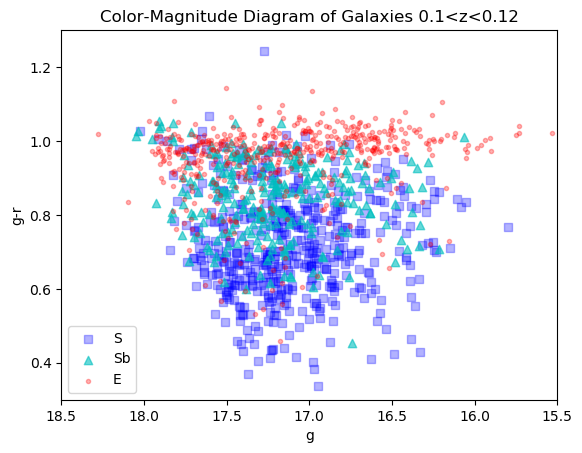

In [63]:
#Color-Magnitude Diagram

plt.scatter(latetype_s['dered_g'],gmr_latetype_s,c='b',label='S',alpha=0.3,marker='s')
plt.scatter(latetype_sb['dered_g'],gmr_latetype_sb,c='c',label='Sb',alpha=0.6,marker='^')
plt.scatter(early['dered_g'],gmr_early,c='r',label='E',alpha=0.3,marker='.')
plt.xlabel('g')
plt.ylabel('g-r')
plt.title('Color-Magnitude Diagram of Galaxies 0.1<z<0.12')
plt.legend(loc='lower left')
plt.axis([18.5, 15.5, 0.3, 1.3])
plt.show()


**Interpretation:** There is a definite morphology-dependence in the color-magnitude diagram. Elliptical galaxies mostly occupy the narrow "red sequence" region but also have some membership in the "blue cloud". Both spiral and barred spiral galaxies are commonly found in the blue cloud, and some can be found in the red sequence as well.  The barred spiral galaxies appear to be the most common type within the "green valley".

-------------
## Exploring the "Green Valley"

Try displaying some cutout images of galaxies that fall in between the "red sequence" and the "blue cloud".  Is there any trend in their morphologies?


In [64]:
# Green Valley: 17<g<18; 0.85<gmr<.9

query="""
SELECT TOP 500 p.objid, p.ra,p.dec,p.petror90_r, p.dered_g, p.dered_r, s.z as z_spec, s.zErr
  FROM Galaxy as p
   JOIN ZooNoSpec AS zns ON p.objid = zns.objid
   JOIN SpecObj AS s ON s.bestobjid = p.objid
WHERE p.clean=1 AND p.dered_g/p.err_g > 10 AND p.dered_r/p.err_r > 10 AND s.z BETWEEN 0.1 and 0.12
    AND p.dered_g BETWEEN 17 and 18 AND (p.dered_g - p.dered_r) BETWEEN 0.85 and .9
"""
gval = CasJobs.executeQuery(query, "dr15")
gval = gval.set_index('objid')

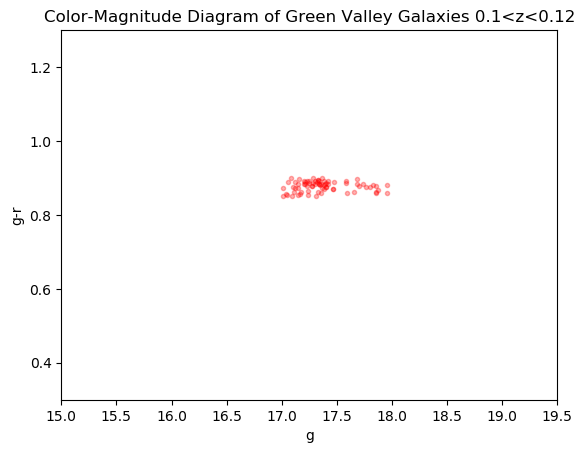

In [65]:
gmr=gval['dered_g']-gval['dered_r']

plt.scatter(gval['dered_g'],gmr,c='r',alpha=0.3,marker='.')
plt.xlabel('g')
plt.ylabel('g-r')
plt.title('Color-Magnitude Diagram of Green Valley Galaxies 0.1<z<0.12')
plt.xlim(15,19.5)
plt.ylim(.3,1.3)
plt.show()

Getting image 1 of 75...
Getting image 2 of 75...
Getting image 3 of 75...
Getting image 4 of 75...
Getting image 5 of 75...
Getting image 6 of 75...
Getting image 7 of 75...
Getting image 8 of 75...
Getting image 9 of 75...
Getting image 10 of 75...
Getting image 11 of 75...
Getting image 12 of 75...
Getting image 13 of 75...
Getting image 14 of 75...
Getting image 15 of 75...
Getting image 16 of 75...


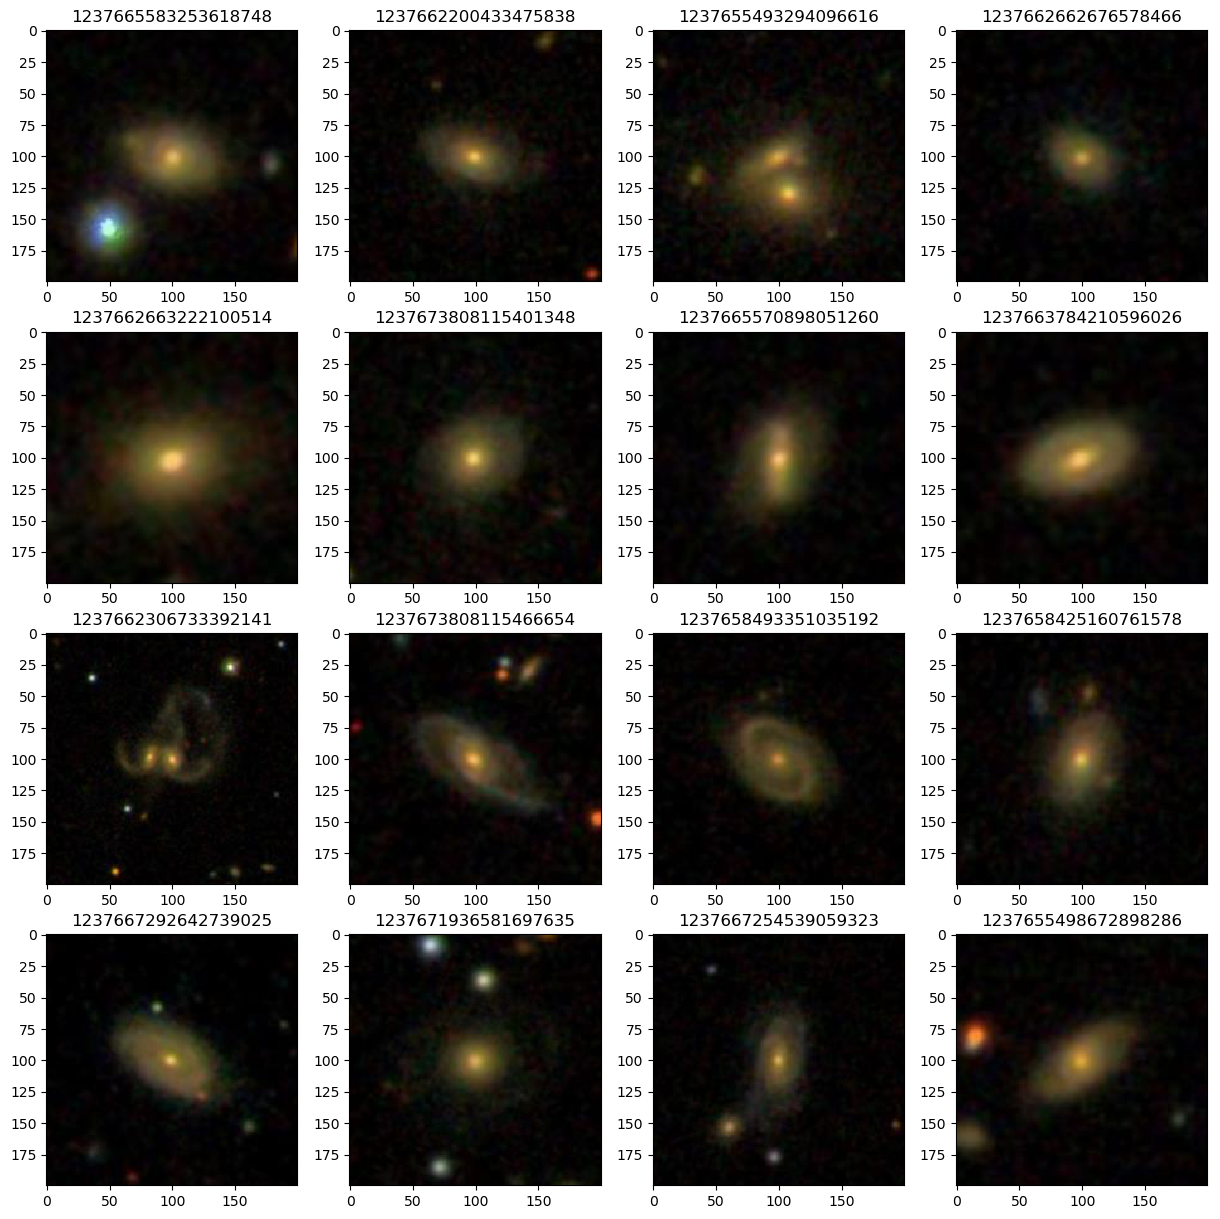

In [66]:
# set thumbnail parameters
width=200           # image width
height=200          # height
pixelsize=0.396     # image scale
plt.figure(figsize=(15, 15))   # display in a 4x4 grid
subPlotNum = 1

i = 0
nGalaxies = len(gval)  # I changed the name of my retrieved data to 'gals_lowv', so I've edited this line (and the next) to match
for index,gal in gval.iterrows():         
    i = i + 1
    if i<17:
        print('Getting image '+str(i)+' of '+str(nGalaxies)+'...')
        if (i == nGalaxies):
            print('Plotting images...')
        scale=2*gal['petror90_r']/pixelsize/width
        img= SciServer.SkyServer.getJpegImgCutout(ra=gal['ra'], dec=gal['dec'], width=width, height=height, scale=scale,dataRelease='DR15')
        plt.subplot(4,4,subPlotNum)
        subPlotNum += 1
        plt.imshow(img)                               # show images in grid
        plt.title(index)                              # show the object identifier (objId) above the image.

**Interpretation:** This small sample of galaxies lying in the "green valley" have a reddish color - like ellipticals - but appear to be mainly disk galaxies with non-constant light profiles, bright cores, and hints of star formation. Bars seem to show up frequently, and we have at least two cases of interacting galaxies.

## ------------------------
## Exploring potential bias in GalaxyZoo data, Part 1

GalaxyZoo works because people are naturally amazing at pattern recognition, even for difficult shapes like spirals, which have historically challenged artificial intelligence.  But our ability to quickly detect patterns can also mean that we are suceptable to bias.

Let's try a couple of quick tests:

First, what fraction of the spirals are identified in GalaxyZoo as "clockwise", compared to "counter-clockwise"?



In [2]:
#spirals: select spirals with clockwise and counter-clockwise fraction of votes > 0

query="""
SELECT TOP 5000 p.objid, p.ra,p.dec,p.petror90_r, p.dered_g, p.dered_r, s.z as z_spec, s.zErr, zns.p_cw as clock, zns.p_acw as anticlock, zns.p_edge as edge
  FROM Galaxy as p
   JOIN ZooNoSpec AS zns ON p.objid = zns.objid
   JOIN SpecObj AS s ON s.bestobjid = p.objid
WHERE zns.p_cs > 0.8 AND (zns.p_cw > 0 OR zns.p_acw > 0) 
"""
zoo_gals = CasJobs.executeQuery(query, "dr15")
spirals = zoo_gals.set_index('objid')
len(spirals)

3579

In [8]:
len(spirals[spirals['clock']>0.8])
from math import sqrt
sqrt(745)
sqrt(827)
np.sqrt(827)

28.75760768909681

In [73]:
clock = 0
anti = 0
for row in range(0, len(spirals)):
    if spirals.iloc[row]['clock'] > spirals.iloc[row]['anticlock']:
        clock = clock + 1
    else:
        anti = anti + 1

total = len(spirals)
clock_frac = clock/total
anti_frac = anti/total

print('Fraction of clockwise spirals: %.3f' % clock_frac)
print('Fraction of counter-clockwise spirals: %.3f' % anti_frac)

Fraction of clockwise spirals: 0.454
Fraction of counter-clockwise spirals: 0.546


**Interpretation:** For galaxies with > 80% of votes identifying them as spiral galaxies, a counter-clockwise spiral direction was chosen 54.6% of the time, whereas clockwise rotation was chosen 45.4% of the time, revealing an apparent bias in idenification of the direction of spiral galaxies.

GalaxyZoo scientists have done extensive testing on this question about how human pattern recognition may be better or worse when observing spirals that wind in a particular direction.   The data for results from their tests can be quereied from the [zooMirrorBias](http://skyserver.sdss.org/dr15/en/help/browser/browser.aspx#&&history=description+zooMirrorBias+U) table.

------------------------
## Exploring potential bias in GalaxyZoo data, Part 2

Next, does the color distribution of "spirals" and "ellipticals" appear any different if the results are obtained by only showing users monochromatic (i.e., black and white) images?  

Explore this question by querying the SDSS table [zooMonochromeBias](https://skyserver.sdss.org/dr12/en/help/browser/browser.aspx#&&history=description+zooMonochromeBias+U), which contains GalaxyZoo results from monochrome images. 

In [128]:
#find color image-selected spirals

query="""
SELECT TOP 1000 p.objid, p.ra,p.dec,p.petror90_r, p.dered_g, p.dered_r, s.z as z_spec, s.zErr
  FROM Galaxy as p
   JOIN zooNoSpec AS zns ON p.objid = zns.objid
   JOIN SpecObj AS s ON s.bestobjid = p.objid
WHERE p.clean=1 AND zns.nvote >= 10 AND zns.p_cs > 0.8 AND p.dered_g/p.err_g > 10 AND p.dered_r/p.err_r > 10 
    AND s.z BETWEEN 0.05 and 0.07
"""
zoo_gals = CasJobs.executeQuery(query, "dr15")
late = zoo_gals.set_index('objid')

#find color image-selected ellipticals

query="""
SELECT TOP 1000 p.objid, p.ra,p.dec,p.petror90_r, p.dered_g, p.dered_r, s.z as z_spec, s.zErr
  FROM Galaxy as p
   JOIN ZooNoSpec AS zns ON p.objid = zns.objid
   JOIN SpecObj AS s ON s.bestobjid = p.objid
WHERE p.clean=1 and zns.nvote >= 10 AND zns.p_el > 0.8 AND p.dered_g/p.err_g > 10 AND p.dered_r/p.err_r > 10
    AND s.z BETWEEN 0.05 and 0.07
"""
zoo_gals = CasJobs.executeQuery(query, "dr15")
early = zoo_gals.set_index('objid')

gmr_late = late['dered_g']-late['dered_r']
gmr_early = early['dered_g']-early['dered_r']

In [129]:
#find monochromatic image-selected spirals

query="""
SELECT TOP 1000 p.objid, p.ra,p.dec,p.petror90_r, p.dered_g, p.dered_r, s.z as z_spec, s.zErr
  FROM Galaxy as p
   JOIN zooMonochromeBias AS zmb ON p.objid = zmb.objid
   JOIN SpecObj AS s ON s.bestobjid = p.objid
WHERE p.clean=1 AND zmb.nvote_mon >= 10 AND zmb.p_cs_mon > 0.8 
    AND p.dered_g/p.err_g > 10 AND p.dered_r/p.err_r > 10 
    AND s.z BETWEEN 0.05 and 0.07

"""
zoo_gals = CasJobs.executeQuery(query, "dr16")
late_mono = zoo_gals.set_index('objid')

#find monochromatic image-selected ellipticals

query="""
SELECT TOP 1000 p.objid, p.ra,p.dec,p.petror90_r, p.dered_g, p.dered_r, s.z as z_spec, s.zErr
  FROM Galaxy as p
   JOIN zooMonochromeBias AS zmb ON p.objid = zmb.objid
   JOIN SpecObj AS s ON s.bestobjid = p.objid
WHERE p.clean=1 AND zmb.nvote_mon >= 10 AND zmb.p_el_mon > 0.8 
    AND p.dered_g/p.err_g > 10 AND p.dered_r/p.err_r > 10 
    AND s.z BETWEEN 0.05 and 0.07
    
"""
zoo_gals = CasJobs.executeQuery(query, "dr16")
early_mono = zoo_gals.set_index('objid')



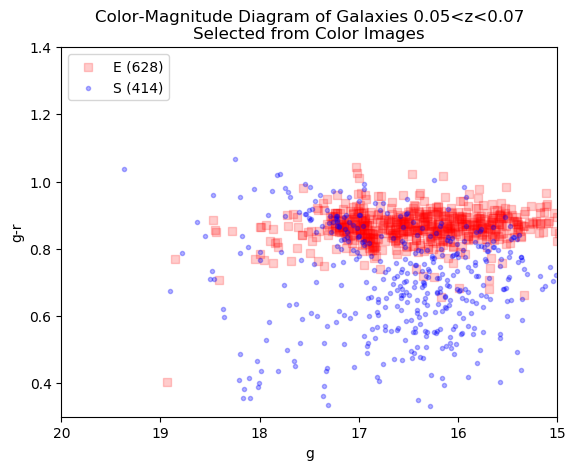

In [130]:
#Color-Magnitude Diagram for Color Images

gmr_late = late['dered_g']-late['dered_r']
gmr_early = early['dered_g']-early['dered_r']

plt.scatter(early['dered_g'],gmr_early,c='r',label='E (%i)' % len(gmr_early),alpha=0.2,marker='s')
plt.scatter(late['dered_g'],gmr_late,c='b',label='S (%i)' % len(gmr_late),alpha=0.3,marker='.')
plt.xlabel('g')
plt.ylabel('g-r')
plt.title('Color-Magnitude Diagram of Galaxies 0.05<z<0.07\nSelected from Color Images')
plt.legend(loc='upper left')
plt.axis([20,15,0.3,1.4])
plt.show()


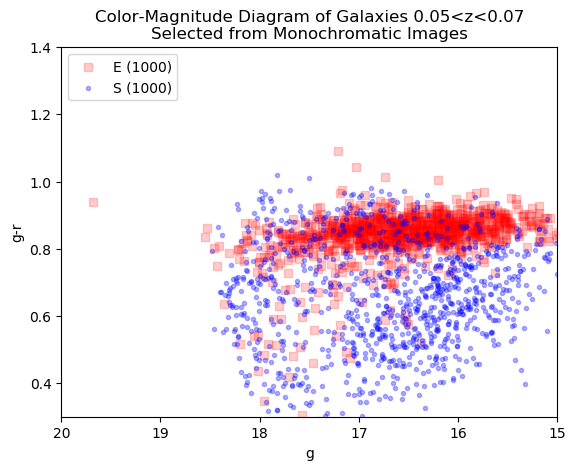

In [133]:
#Color-Magnitude Diagram for Monochromatic Images

gmr_late_mono = late_mono['dered_g']-late_mono['dered_r']
gmr_early_mono = early_mono['dered_g']-early_mono['dered_r']

plt.scatter(early_mono['dered_g'],gmr_early_mono,c='r',label='E (%i)' % len(gmr_early_mono),alpha=0.2,marker='s')
plt.scatter(late_mono['dered_g'],gmr_late_mono,c='b',label='S (%i)' % len(gmr_late_mono),alpha=0.3,marker='.')

plt.xlabel('g')
plt.ylabel('g-r')
plt.title('Color-Magnitude Diagram of Galaxies 0.05<z<0.07\nSelected from Monochromatic Images')
plt.legend(loc='upper left')
plt.axis([20,15,0.3,1.4])
plt.show()


In [132]:
gmr_avg_late_mono = np.mean(gmr_late_mono)
gmr_avg_early_mono = np.mean(gmr_early_mono)
gmr_avg_late = np.mean(gmr_late)
gmr_avg_early = np.mean(gmr_early)

print('Average g-r:\n')
print('Spirals: ' + str(np.round(gmr_avg_late,2)))
print('Ellipticals: ' + str(np.round(gmr_avg_early,2)))
print('Monochromatic Spirals: ' + str(np.round(gmr_avg_late_mono,2)))
print('Monochromatic Ellipticals: ' + str(np.round(gmr_avg_early_mono,2)))



Average g-r:

Spirals: 0.7
Ellipticals: 0.86
Monochromatic Spirals: 0.66
Monochromatic Ellipticals: 0.84


**Interpretation:** Depending on what redshift requirements you use in your query you could get different results here.  By selecting only galaxies in the redshift range 0.05<z<0.07 we reduce the color-redshift correlation and also limit the observations to more nearby galaxies, which should be easier to classify morphologically. 

Applying this requirement, we find a few things:

1) In the monochrome sample, more galaxies of both types made the cut of >80% agreement from users in terms of their morphological type. Perhaps it is easier to determine the shape when color is not complicating the picture? For instance, the shapes of red spirals and blue ellipticals may lead to more disagreement amongst Galaxy Zoo users when the full-color images are available, since people may start to expect all ellipticals to be red and all spirals to be blue.

2) There doesn't appear to be a very significant difference in the average color comparing the monochrome and full-color classifications of elliptical galaxies. And while there appears to be a more significant difference in the colors of galaxies that users classified as spirals in monochrome vs. full-color images, this is not very significant either.